#Who do we target for Donations

- We have a dataset of people we approached for doners for our Election campaign
- We have their education, job, income, ethnicity 
- We know high income earners are better to approach for political donations

### Let's build a classifier that predicts income levels based on a person's attributes. 
Those will be the persons we appraoch first for political donations

In [1]:
import pandas as pd

census = pd.read_csv('./data/donations/adult.data') 

# Preview our data
census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Where are our column names? They're given separately

In [0]:
column_names = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']          

In [3]:
census = pd.DataFrame(census.values, columns = column_names)
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
print ("Rows     : " ,census.shape[0])
print ("Columns  : " ,census.shape[1])
print ("\nFeatures : \n" ,census.columns.tolist())
print ("\nMissing values :  ", census.isnull().sum().values.sum())
print ("\nUnique values :  \n",census.nunique())

Rows     :  32560
Columns  :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income']

Missing values :   0

Unique values :  
 age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64


In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null object
workclass         32560 non-null object
fnlwgt            32560 non-null object
education         32560 non-null object
education-num     32560 non-null object
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null object
capital-loss      32560 non-null object
hours-per-week    32560 non-null object
native-country    32560 non-null object
Income            32560 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


### They're all object datatype, can Pandas automatically fix this?

In [6]:
# use Pandas's infer_objects
census = census.infer_objects()
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis

In [8]:
# Use strip to remove white space characters before and after our data
census['Income'] = census['Income'].str.strip()
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
# Total number of records
n_records = census.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = census.loc[census['Income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = census[census['Income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 32560
Individuals making more than $50,000: 7841
Individuals making at most $50,000: 24719
Percentage of individuals making more than $50,000: 24.08%


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


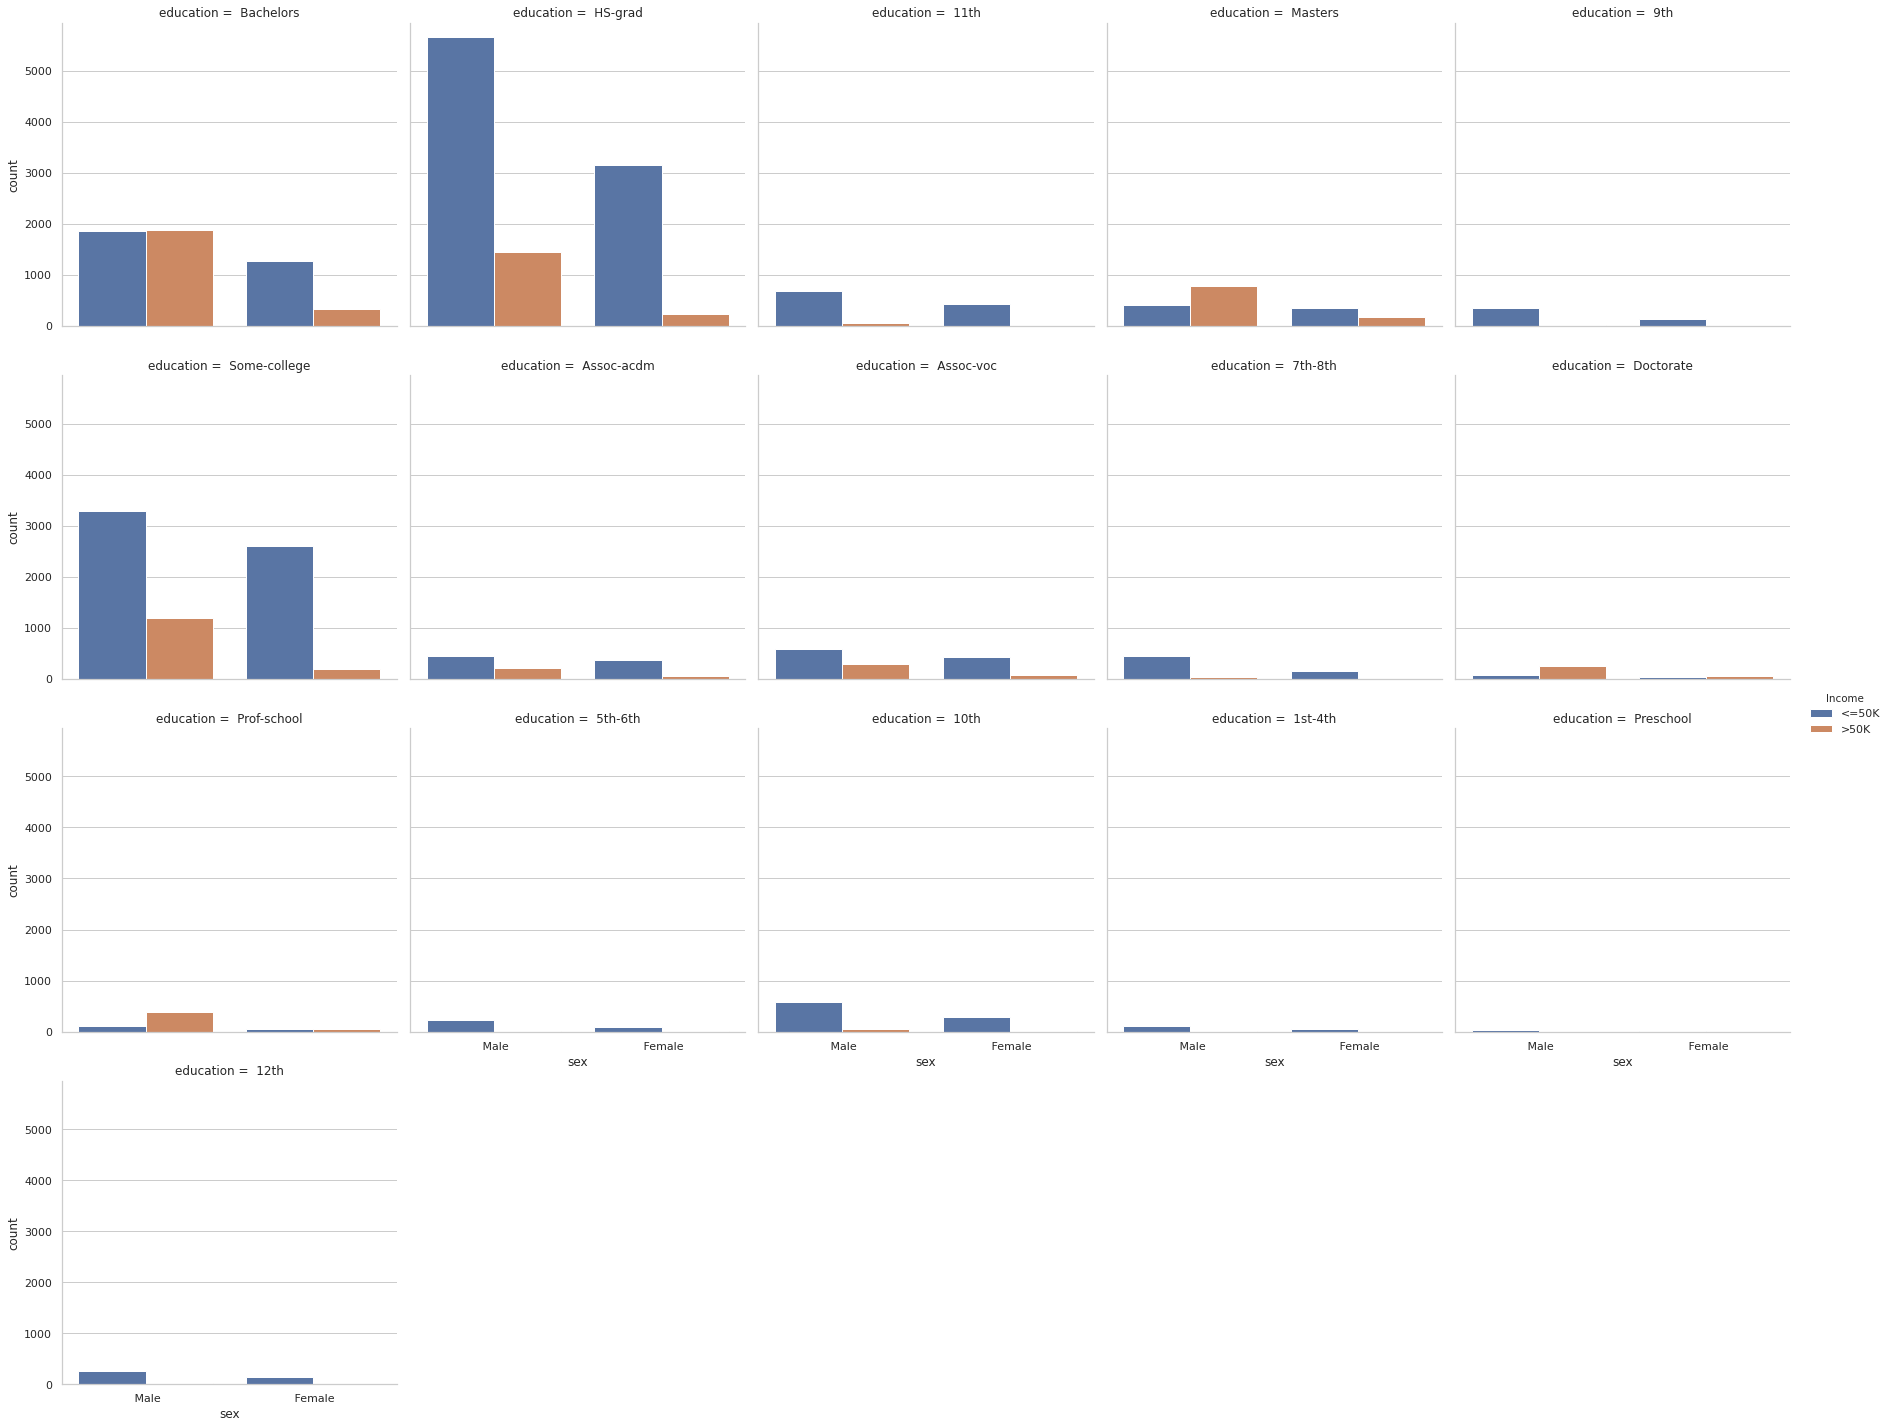

In [12]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", color_codes=True)
sns.factorplot("sex", col='education', data=census, hue='Income', kind="count", col_wrap=5);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75046fa5c0>]],
      dtype=object)

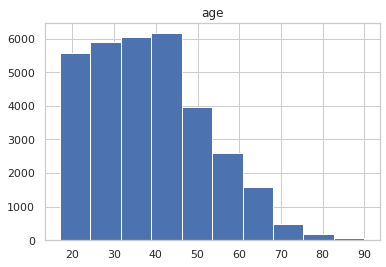

In [13]:
# Age Histogram 
census.hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75046b8320>]],
      dtype=object)

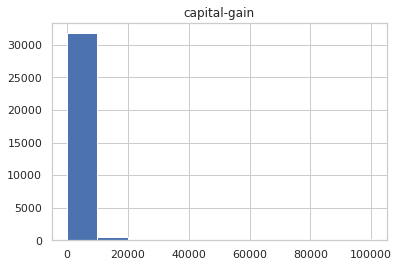

In [14]:
census.hist(column='capital-gain')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f750460e4a8>]],
      dtype=object)

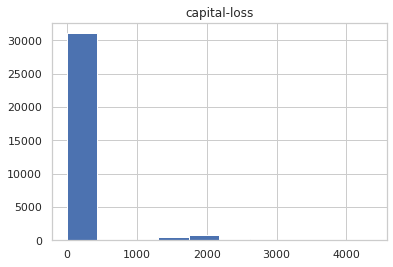

In [15]:
census.hist(column='capital-loss')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7506fc2cf8>],
      dtype=object)

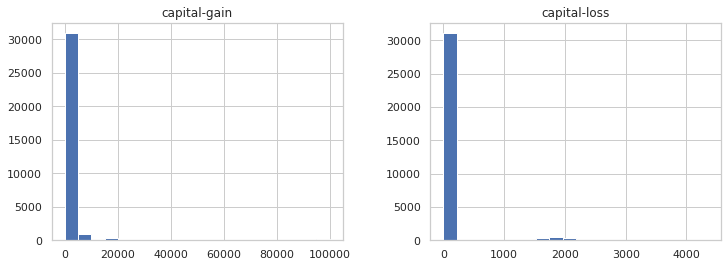

In [16]:
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12,4))

census.hist('capital-gain', bins=20, ax=axes[0])
census.hist('capital-loss', bins=20, ax=axes[1])

In [17]:
skewed = ['capital-gain', 'capital-loss']
census[skewed] = census[skewed].apply(lambda x: np.log(x + 1))
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f750723a3c8>],
      dtype=object)

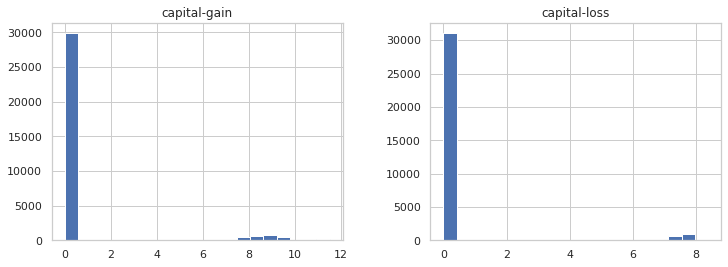

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

census.hist('capital-gain', bins=20, ax=axes[0])
census.hist('capital-loss', bins=20, ax=axes[1])

In [24]:
# fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents
census.drop(['fnlwgt'], axis=1, inplace=True)
census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40,United-States,<=50K


In [25]:
# Check for nulls
census[census.isnull().any(axis=1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income


In [26]:
# Find '?' in dataset column occupation
census[census['occupation'] == " ?"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.000000,0.0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0.000000,0.0,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0.000000,0.0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0.000000,0.0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,10.436935,0.0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0.000000,0.0,55,United-States,>50K
32530,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0.000000,0.0,99,United-States,<=50K
32538,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0.000000,0.0,10,United-States,>50K
32540,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0.000000,0.0,32,United-States,<=50K


In [27]:
census[census['native-country'] == " ?"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
13,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0.000000,40,?,>50K
37,31,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.000000,38,?,>50K
50,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.000000,30,?,<=50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0.0,0.000000,40,?,<=50K
92,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0.0,7.361375,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.000000,50,?,>50K
32468,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.000000,99,?,<=50K
32491,42,Self-emp-not-inc,HS-grad,9,Divorced,Sales,Own-child,White,Male,0.0,0.000000,50,?,<=50K
32509,39,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.000000,45,?,>50K


In [0]:
## Drop missing data
#census = census[census['workclass'] != " ?"]
census = census[census['occupation'] != " ?"]
census = census[census['native-country'] != " ?"]

In [29]:
census[census['native-country'] == " ?"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income


In [30]:
census[census['occupation'] == " ?"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
